In [1]:
from sympy import *
init_printing()
n, k = symbols("n, k", integer=True)
f = Function("f")
x, y = symbols("x, y")

# Various approaches to solving the Fibonacci recursion

![Alt text](./fbc.svg)
from https://pixabay.com/vectors/fibonacci-golden-ratio-3594147/

The notes here explore calculating Fibonacci numbers from different perspective. The goal is to explore a various ways to solve the same elementary problem, and point some connections between them.

For simplicity the solutions will be based on python and its CAS library Sympy.

First we solve the recurence just using the proper library method.

Based on the book generatingfunctionology by Herbert S. Wilf we can learn nice way to calculate recursive equations.
The book is available for free here: https://people.math.rochester.edu/faculty/doug/otherpapers/wilf.pdf

Then we will solve the recursion using elementary linear algebra.

And finally we solve it with classic for python programing methods.

Lets start Fibonacci recursion takes form: $$F_{n+1}=F_n+F_{n-1}\ (F_0=0; F_1=1)$$

Lets describe nth coefficient as solution of recurence:

In [2]:
from sympy.series.sequences import RecursiveSeq
fib = RecursiveSeq(f(n - 1) + f(n - 2), f(n), n, [0, 1])

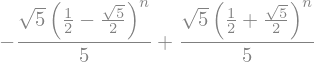

In [3]:
nth = rsolve(fib.recurrence.rhs - fib.recurrence.lhs, fib.recurrence.lhs, list(fib.initial))
nth

In [4]:
list((nth.subs(n,x).simplify() for x in range(1,13)))

Lets mark the connection to the golden ratio here:

Lets calculate $$\displaystyle \lim_{n\rightarrow\infty} \frac{F_{n+1}}{F_n}$$

In [5]:
(nth.subs(n, n+1) / nth).limit(n, 100).evalf() # 100 is big enough

We can extract the most revelant coefficient to see that it is dominant.

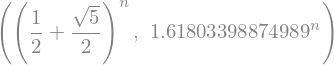

In [6]:
nth.args[1].args[2], nth.args[1].args[2].evalf()

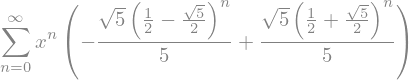

In [7]:
recurence_sum = Sum(nth * (x ** n),(n,0,oo))
recurence_sum

## Generating function

Lets get nth coefficient as solution of the generating function sometimes also called unitary Z transform:

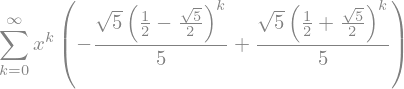

In [8]:
from sympy import fps
fib_gen = x/(1-x-x**2)
fib_genf = fps(fib_gen)
fib_genf

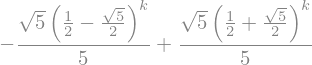

In [9]:
nth_genf = fib_genf.ak.formula
nth_genf

They look the same, can we put them the same form and compare:

In [10]:
type(nth_genf), type(nth)

(sympy.core.add.Add, sympy.core.add.Add)

In [11]:
free_k = nth_genf.free_symbols
the_k = free_k.pop()

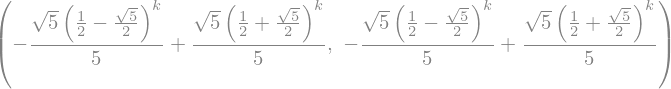

In [12]:
nth_genf.xreplace({the_k:k}), nth.xreplace({n:k}) 

### Ordinary generating function operations

From the book we can find a rules that can be helpful in manipulating the generating functions.
Lets $$f\ \overset{ops}\longleftrightarrow\  \{a_n\}^\infty_n, g\ \overset{ops}\longleftrightarrow\  \{b_n\}^\infty_n $$
Then
Rule 1:
 $$\frac{f - a_0 - \ldots - a_{h-1}x^{h-1}}{x^h}\ \overset{ops}\longleftrightarrow\  \{a_{n+h}\}^\infty_n$$
Rule 2:
 $$P(xD)f \overset{ops}\longleftrightarrow\  \{P(n)\cdot a_n\}^\infty_n  $$ 
Rule 3:
 $$f \cdot g \overset{ops}\longleftrightarrow\  {\huge\{} \sum_{r=0}^n a_r\cdot b_{n-r} {\huge\}}^\infty_n  $$  
 Rule 4:
 $$f^k \overset{ops}\longleftrightarrow\ {\huge\{} \sum_{n_1+\cdots + n_k=n}  a_{n_1} \cdot \cdots \cdot a_{n_k} {\huge\}}^\infty_n  $$ 
 Rule 5:
 $$\frac{f}{1-x} \overset{ops}\longleftrightarrow\  {\huge\{} \sum_{j=0}^n a_j {\huge\}}^\infty_n  $$ 
 

For convenience we will implement some of the functions:

In [13]:
def shift(fun, coeffs):
    for index, coeff in enumerate(coeffs):
        fun = fun - coeff * x ** index
    return fun/x ** len(coeffs)

def xDiffN(fun, N):
    for i in range(0,N):
        fun = x * diff(fun,x)
    return fun

We can use our operator to get generating function for the Fibonnacci recursion through generating functions manipulation.

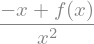

In [14]:
f2 = shift(f(x), [0,1])
f2

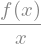

In [15]:
f1 = shift(f(x), [0])
f1

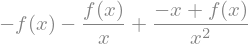

In [16]:
eq = Function("eq")
eq = f2 - f1 - f(x)
eq

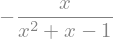

In [17]:
list(solveset(eq,f(x))).pop()

Check rule 2 (p. 35)

For Rule 5 let's try Example 6 from p.38. Proving some intersting equality for the sequence.
$$ $$
$$F_0 + F_1 + \ldots + F_n = F_{n+2} - 1$$

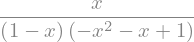

In [18]:
lhs = fib_gen /(1 - x).simplify()
lhs

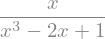

In [19]:
rhs = (shift(fib_gen,[0,1]) - 1/(1-x)).simplify()
rhs

In [20]:
(lhs - rhs).simplify()

## Exponential generating function operations

The same way we can use the exponential generating functions and their rules to figure out Fibonacci sequence.

Lets $$f\ \overset{egf}\longleftrightarrow\  \{a_n\}^\infty_n, g\ \overset{egf}\longleftrightarrow\  \{b_n\}^\infty_n $$
Then
Rule 1':
 $$D^hf \overset{egf}\longleftrightarrow\  \{a_{n+h}\}^\infty_n$$
Rule 2':
 $$P(xD)f \overset{egf}\longleftrightarrow\  \{P(n)\cdot a_n\}^\infty_n  $$ 
Rule 3':
 $$f \cdot g \overset{egf}\longleftrightarrow\  {\huge\{} \sum_{r} \binom{n}{r}\cdot a_r\cdot b_{n-r} {\huge\}}^\infty_n  $$  
 

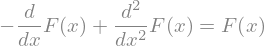

In [21]:
F = symbols('F', cls=Function)
diffeq = Eq(F(x).diff(x, x) - F(x).diff(x), F(x))
diffeq

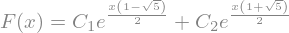

In [22]:
Solution = dsolve(diffeq, F(x))
Solution

In [23]:
CopyFree = Solution.free_symbols.copy()
CopyFree.discard(x)
[C1 , C2] = list(CopyFree)

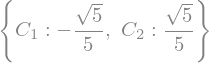

In [24]:
C1 = solve(Solution.subs(x, 0).subs(F(0), 0), 'C1')[0]
Solution

inits = solve([Solution.rhs.diff(x).subs(x, 0) - 1,
Solution.rhs.subs(x, 0) -  0])
inits

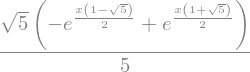

In [25]:
S = Solution.subs(inits).rhs.simplify()
S

In [26]:
def exp_fps(Equation):
    formula = fps(Equation).ak.formula
    the_k = list(formula.free_symbols)
    if the_k:
        return (formula.subs(the_k[0], k) * factorial(k)).simplify()
    else:
        return formula.simplify()
    
def ord_fps(Equation):
    formula = fps(Equation).ak.formula
    the_k = list(formula.free_symbols)
    if the_k:
        return (formula.subs(the_k[0], k)).simplify()
    else:
        return formula.simplify()

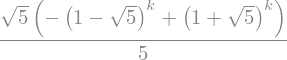

In [27]:
(exp_fps(S)*2**k).simplify()

##  The recurrence as matrix

 Lets try transform the equation: $$F_{n+1}=F_n+F_{n-1}\ (F_0=0; F_1=1)$$
 into a matrix form:

We can see than $F_n$ depends on two previous variables, so we want a matrix 2x2 that:
$$\begin{pmatrix}
c_1 & c_2\\
c_3 & c_4
\end{pmatrix}\cdot \binom{F_n}{F_{n-1}} = \binom{F_{n+1}}{F_n} = \binom{F_n+F_{n-1}}{F_n} = \binom{F_{n+1}}{F_n}$$

So the matrix is:
$$ \begin{pmatrix}
1 & 1\\
1 & 0
\end{pmatrix}^n \cdot \binom{1}{0} = \binom{F_{n}}{F_{n-1}} $$

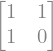

In [28]:
M = Matrix([[1,1], [1, 0]])
M

In [29]:
(M**4 * Matrix([1,0]))[0]

Calculating powers of matrices is quite expensive, we usually making a trick called diagonal decomposition to do that.
For any square matrix we can find the diagonal matrix $D$ and a matrix $P$, that $M = P\cdot D \cdot P^{-1}$. Since diagonal matrices are easy do multiply we save a lot of calculations:

$$M^n = (P\cdot D \cdot P^{-1})^n = P\cdot D^n \cdot P^{-1}$$.

Lets do it:

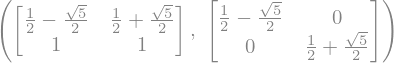

In [30]:
P, D = M.diagonalize()
P, D

It occurs our $D$ matrix is composed from the same values (eigenvalues) as explicit formula for our sequence.

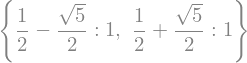

In [31]:
M.eigenvals()

It is logical because both define how quick our sequence grows. Lets check if calculations are correct.

In [32]:
simplify(P * D**4 * P.inv())[0,0]

There is also connection betwen the generating function and the characteristic polynomial of the matrix.

In [33]:
M.charpoly(x).as_expr()

## Dynamic programing

Since we have matrix/recursive representation of our problem we can easily read how to calculate it bottom-up.

In [34]:
def fib_bu(n):
    f1, f2 = 0, 1
    return fib_bu_help(n, f1,f2)
    
def fib_bu_help(n, f1, f2):
    if n > 0:
        f1, f2 = f2, f1 + f2
        return fib_bu_help(n-1, f1, f2)
    else: return f2    

In [35]:
fib_bu(4)

And also up-bottom.

In [36]:
def fib_ub(n):
    f1, f2 = 1, 0
    return fib_ub_help(n, f1, f2)[1]
    
def fib_ub_help(n, f1, f2):
    if n == 0:
        return n, f1, f2
    else:       
        _, f3, f4 = fib_ub_help(n-1, f1 + f2, f1)
        return n-1, f3, f4        
       

In [37]:
fib_ub(5)

In [38]:
list((fib_bu(x) for x in range(12)))

In [39]:
list((fib_ub(x) for x in range(12)))

We can help ourselves with decorators.

In [40]:
memory = {}
def memoize_linear(f):
    def inner(n):
        if n not in memory:
            memory[n] = f(n)
        return memory[n]
    return inner
     
@memoize_linear
def fib_me(n):
    if n == 0:
        return 1
    if n == 1:
        return 1
    else:
        return  fib_me(n-1) + fib_me(n-2)

fib_me(4) 

In [41]:
list((fib_me(x)) for x in range(12))

Generator in case we do not know how many Fibonacci numbers we want to generate.

In [42]:
def fib_inf():
    f1, f2 = 1, 0
    while True:
        yield f1
        f1, f2 = f1 + f2, f1


In [43]:
gen =  fib_inf()
[next(gen) for i in range(12)]

Just for fun one more implementation. Multiprocess implementation. 

In [44]:
from multiprocessing import Process, Lock
from multiprocessing.sharedctypes import Value, Array

def modify(f1, f2):
    temp = f1.value
    f1.value = f2.value + f1.value 
    f2.value = temp

lock = Lock()

f1 = Value('i', 1, lock=lock)
f2 = Value('i', 1, lock=lock)

x=0
n=5
while(x<n):
    Process(target=modify, args=(f1, f2)).start()
    x+=1

f1.value

And another one. Insspired by [Introduction To Algorithms](https://www.amazon.com/Introduction-Algorithms-third-Thomas-Cormen-ebook/dp/B08FH8N996) book. Unfortunatelly I did not manage to make it exacly one-to-one with asyncio. The impentation does not run from Jupyter notebook, because it running event loop by itself. 

In [45]:
import asyncio

async def fib_fut(n):
    if n == 0:
        return 1
    if n == 1:
        return 1
    f1, f2 = await asyncio.gather(fib_fut(n-1), fib_fut(n-2))
   
    return f1 + f2   

R = fib_fut(4)

In [ ]:
asyncio.run(R)

Since we are pushing a little bit boundaries here, it is better to finish this notebook.